## **Sales Analysis**

Import Pandas

In [1]:
import pandas as pd
import os

Merge Twelve Month Data Into Single Month CSV

In [2]:
files = ['/content/Sales_April_2019.csv', '/content/Sales_August_2019.csv' , '/content/Sales_December_2019.csv', '/content/Sales_February_2019.csv', '/content/Sales_January_2019.csv' , '/content/Sales_July_2019.csv' , '/content/Sales_June_2019.csv' , '/content/Sales_March_2019.csv' , '/content/Sales_May_2019.csv' , '/content/Sales_November_2019.csv' , '/content/Sales_October_2019.csv' , '/content/Sales_September_2019.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_files.csv', index=False)


Read in Updated Data Frame




In [3]:
merged_files = pd.read_csv("merged_files.csv")
merged_files.head


<bound method NDFrame.head of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0  

**Clean up Data**

Drop Rows of NAN

In [4]:
nan_df = merged_files[merged_files.isna().any(axis=1)]
nan_df.head()

merged_files=merged_files.dropna(how='any')

Find Or and Delet it

In [5]:
merged_files=merged_files[merged_files['Order Date'].str[0:2] != 'Or']

Convert Column to Correct Type

In [6]:
merged_files['Quantity Ordered'] = pd.to_numeric(merged_files['Quantity Ordered'])
merged_files['Price Each'] = pd.to_numeric(merged_files['Price Each'])
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**Additional Columns**

Add Month Column

In [7]:
merged_files['Month'] = merged_files['Order Date'].str[0:2]
merged_files['Month'] = merged_files['Month'].astype('int32')
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Add sales Column

In [8]:
merged_files['Sales']=merged_files['Quantity Ordered'] * merged_files['Price Each']
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


**Question:1 Which was the best month for sales? How much was earned that month?**

>



In [9]:
results = merged_files.groupby('Month').sum()

<ipython-input-9-60b582f64a25>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = merged_files.groupby('Month').sum()


Text(0.5, 0, 'Month Number')

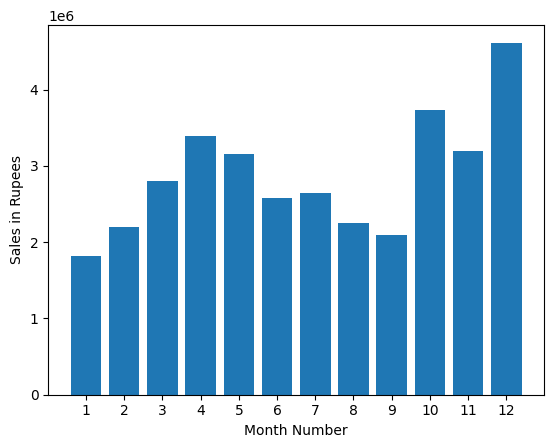

In [10]:
import matplotlib.pyplot as plt

months = range (1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Rupees')
plt.xlabel('Month Number')


**Question:2 What city have the highest number sales?**

Add a City Column

In [11]:
# Let us use .apply()
def get_city(address):
  return address.split(',')[1]

def get_state(address):
 return address.split(',')[2].split(' ')[1]

merged_files['City']=merged_files['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [12]:
results = merged_files.groupby ('City').sum()
results

<ipython-input-12-c7824764005a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = merged_files.groupby ('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


Text(0.5, 0, 'City Name')

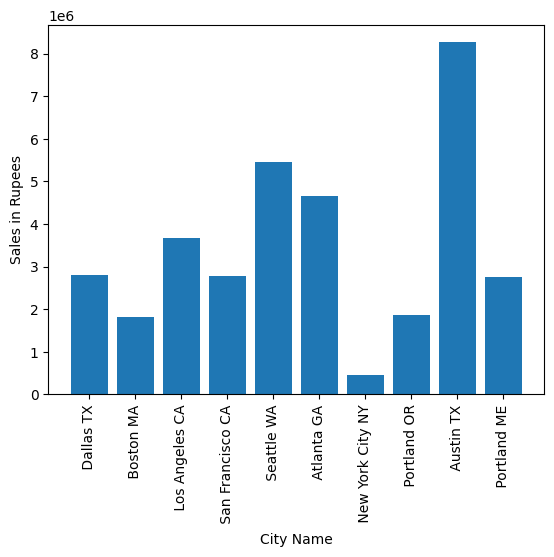

In [13]:
import matplotlib.pyplot as plt

cities = merged_files['City'].unique()
plt.bar(cities, results['Sales'])
plt.xticks(cities , rotation='vertical')
plt.ylabel('Sales in Rupees')
plt.xlabel('City Name')


**Question 3: What time we should display advertisment to maximize liklihood of buying of customers**

In [23]:

df = merged_files[merged_files['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
merged_files.head(20)

df=df[['Order ID' , 'Grouped']].drop_duplicates()
df.head()


<ipython-input-23-09e0d050b6c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter ()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key , value in count.most_common(10):
  print(key,value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


**Question 4: What product sold the modt? Why you think it is sold the most?**

In [36]:
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [38]:
product_group = merged_files.groupby('Product')
product_group.sum()

<ipython-input-38-e7a3bc71d817>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group.sum()


,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


<ipython-input-60-84fc04a50bc6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


([<matplotlib.axis.XTick at 0x7f75c03c5240>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

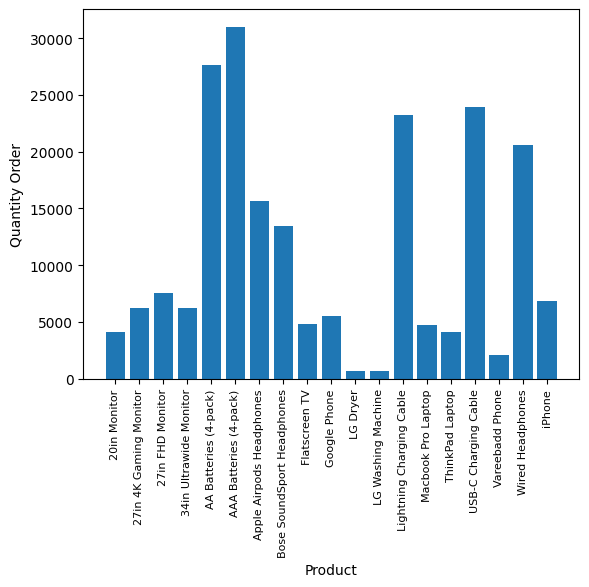

In [60]:
product_group = merged_files.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products , quantity_ordered)
plt.ylabel('Quantity Order')
plt.xlabel('Product')
plt.xticks (products , rotation='vertical',size=8)

<ipython-input-66-b43bded1856c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products  ,rotation='vertical',size=8)


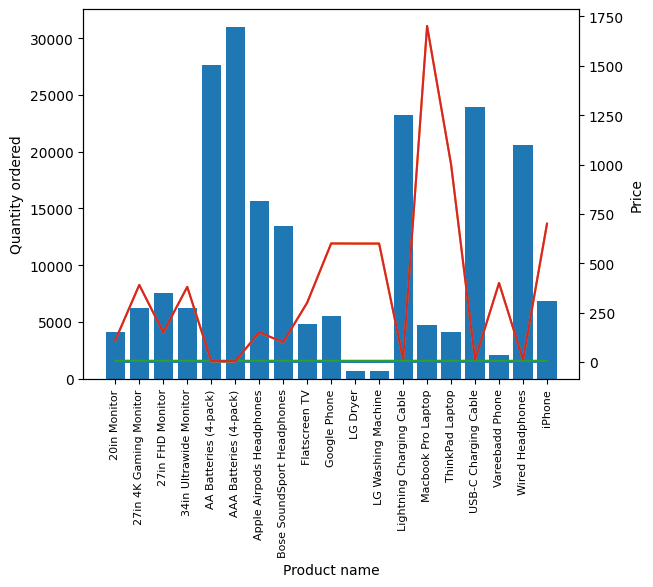

In [66]:
prices = merged_files.groupby('Product').mean(['Price Each'])

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices)

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(products  ,rotation='vertical',size=8)

plt.show()